# Inflation Prediction Project
Fixed and Cleaned Notebook ✅

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score


### Load Dataset

In [10]:
df = pd.read_csv('economic_indicators_dataset_2010_2023.csv')  # assuming the file is named inflation_data.csv
df['Date'] = pd.to_datetime(df['Date'])
df.head()


,Date,Country,Inflation Rate (%),GDP Growth Rate (%),Unemployment Rate (%),Interest Rate (%),Stock Index Value
0,2010-01-31,Brazil,1.23,0.69,10.48,7.71,21748.85
1,2010-01-31,France,6.76,2.59,4.27,7.39,10039.56
2,2010-01-31,USA,7.46,4.84,2.64,6.39,13129.10
3,2010-02-28,Brazil,5.43,0.31,8.26,6.09,23304.58
4,2010-02-28,Canada,0.69,-0.52,11.92,-0.51,16413.03


### Data Info

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   500 non-null    datetime64[ns]
 1   Country                500 non-null    object        
 2   Inflation Rate (%)     500 non-null    float64       
 3   GDP Growth Rate (%)    500 non-null    float64       
 4   Unemployment Rate (%)  500 non-null    float64       
 5   Interest Rate (%)      500 non-null    float64       
 6   Stock Index Value      500 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 27.5+ KB


### Visualize Numeric Features

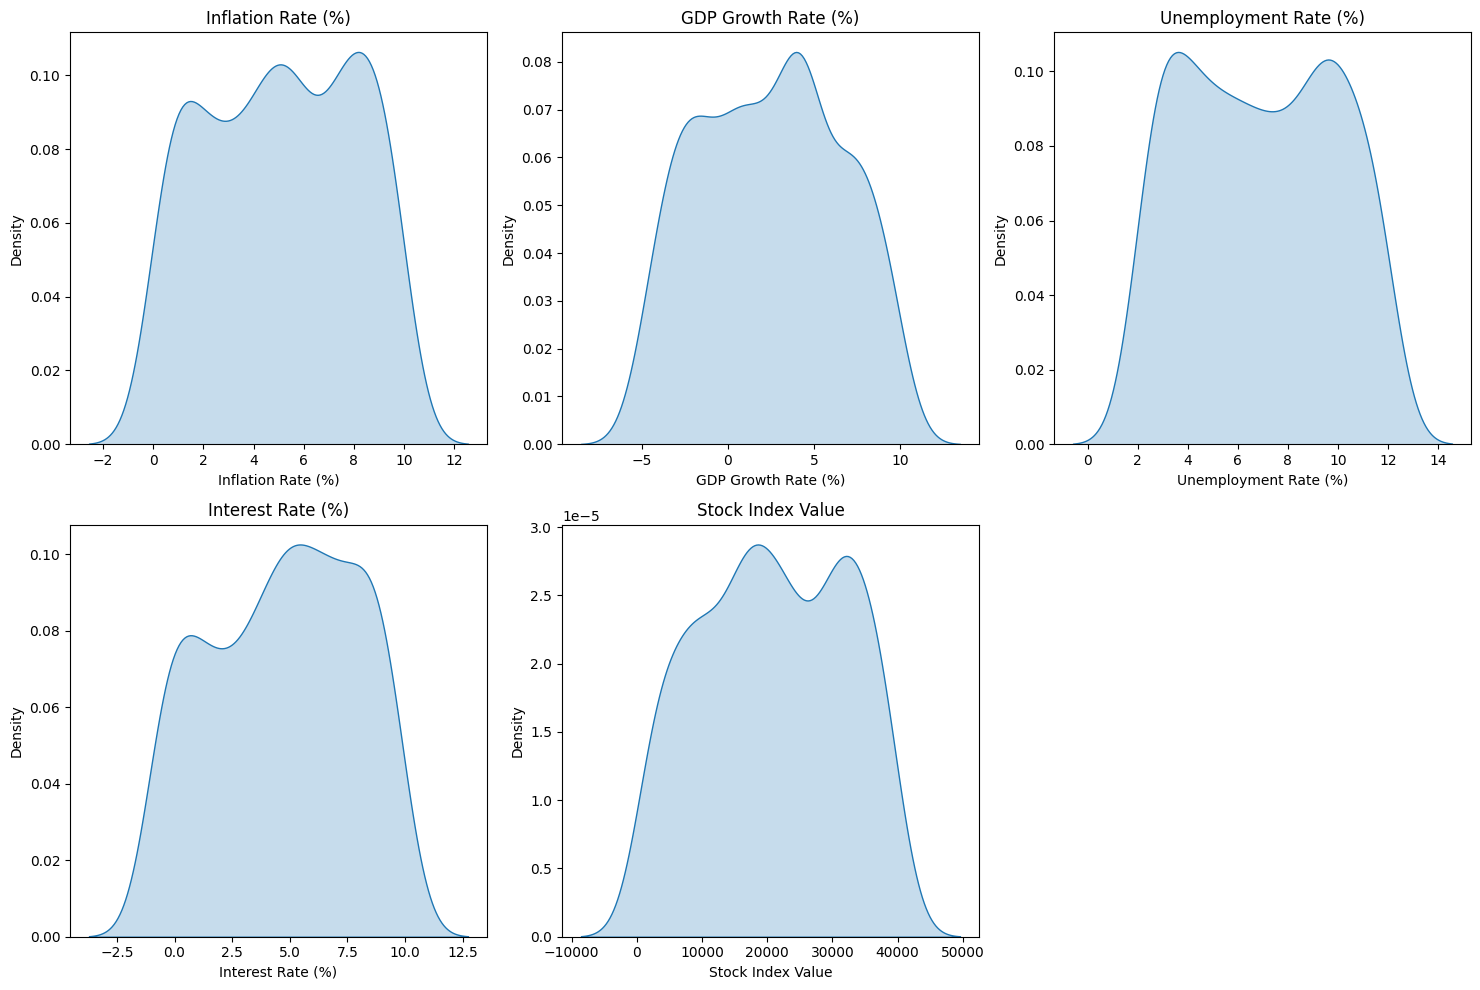

In [12]:
numeric_cols = df.select_dtypes(include=['float64']).columns

plt.figure(figsize=(15, 10))
for idx, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, idx)
    sns.kdeplot(df[col], fill=True)
    plt.title(col)
plt.tight_layout()
plt.show()


### Preprocessing

In [13]:
# Drop Date column
df = df.drop(columns=['Date'])

# One-hot encode Country
df = pd.get_dummies(df, columns=['Country'], drop_first=True)

# Features and Target
X = df.drop('Inflation Rate (%)', axis=1)
y = df['Inflation Rate (%)']

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### Model Training and Evaluation

In [14]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    results[name] = r2

# Display Results
results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))
for model_name, score in results.items():
    print(f"{model_name}: R2 Score = {score:.4f}")


Lasso Regression: R2 Score = -0.0076
Ridge Regression: R2 Score = -0.0438
Linear Regression: R2 Score = -0.0441
Random Forest: R2 Score = -0.0594
Gradient Boosting: R2 Score = -0.1081
Decision Tree: R2 Score = -1.0132


In [16]:
# Save the best model
best_model = models[max(results, key=results.get)]
joblib.dump(best_model, 'best_inflation_model.pkl')

['best_inflation_model.pkl']